In [1]:
from h20 import H2OMLAgentEnhanced

In [2]:
dir(H2OMLAgentEnhanced)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_make_compiled_graph',
 'empirical_cdf',
 'empirical_edf',
 'get_best_model_id',
 'get_calibration_metrics',
 'get_h2o_train_function',
 'get_leaderboard',
 'get_model_parameters',
 'get_model_path',
 'get_model_type',
 'get_optimization_results',
 'get_test_metrics',
 'invoke',
 'invoke_agent',
 'plot_cdf_vs_edf_for_leaderboard',
 'plot_reliability_curves_for_leaderboard',
 'stream',
 'train_and_compare_all_models',
 'update_params']

In [3]:
import os

from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

import pandas as pd
from langchain_openai import ChatOpenAI
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Import your H2O ML Agent (assuming it's saved as h2o_ml_agent_enhanced.py)
from h20 import H2OMLAgentEnhanced

# Check for OpenAI API key
if not os.getenv("OPENAI_API_KEY"):
    print("❌ Error: OPENAI_API_KEY environment variable is not set!")
    print("Please set your OpenAI API key by running one of these commands:")
    print("  export OPENAI_API_KEY='your-api-key-here'")
    print("  or")
    print("  OPENAI_API_KEY='your-api-key-here' python script.py")
    print("\nYou can get an API key from: https://platform.openai.com/api-keys")
    exit(1)

# 1. Set up the language model
llm = ChatOpenAI(
    model="gpt-4o-mini", temperature=0.1  # or "gpt-4" for better performance
)

# 2. Create or Load your dataset
# Option A: Create sample data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42,
)

# Convert to DataFrame
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Option B: Load your own data
# df = pd.read_csv("your_data.csv")
# X = df.drop(columns=["target"])  # Replace "target" with your target column
# y = df["target"]

# 3. Split the data into train/test/calibration sets
X = df.drop(columns=["target"])
y = df["target"]

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate calibration set from remaining data (25% of temp = 20% of total)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Calibration set size: {len(X_calib)}")

# 4. Set up directories
LOG_PATH = "logs/"
MODEL_PATH = "models/"
os.makedirs(LOG_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)

# 5. Initialize the H2O ML Agent
ml_agent = H2OMLAgentEnhanced(
    model=llm,
    log=True,
    log_path=LOG_PATH,
    model_directory=MODEL_PATH,
    n_samples=30,
    file_name="h2o_automl_enhanced.py",
    function_name="h2o_automl_enhanced",
    overwrite=True,
    human_in_the_loop=False,  # Set to True if you want to review steps
    bypass_recommended_steps=False,  # Set to True to skip recommendation step
    bypass_explain_code=False,  # Set to True to skip code explanation
    enable_mlflow=False,  # Set to True to enable MLflow logging
    mlflow_tracking_uri=None,
    mlflow_experiment_name="H2O AutoML Enhanced Experiment",
    mlflow_run_name="test_run_1",
    enable_optuna=True,  # Enable Optuna optimization
    optuna_n_trials=20,  # Number of optimization trials
    optuna_timeout=300,  # Timeout in seconds
)

# 6. Run the agent
print("Starting H2O ML Agent Enhanced...")

Train set size: 600
Test set size: 200
Calibration set size: 200
Starting H2O ML Agent Enhanced...


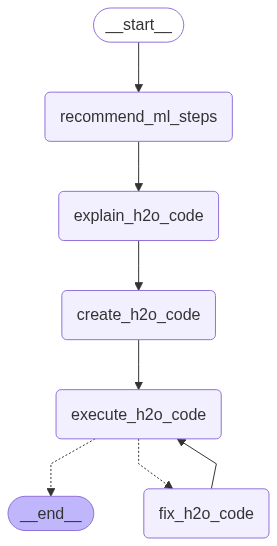

In [4]:
ml_agent._compiled_graph

In [ ]:
ml_agent.invoke_agent(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    X_calib=X_calib,
    y_calib=y_calib,
    user_instructions="""
    Please create an H2O AutoML model for binary classification.
    Focus on maximizing AUC score while maintaining good precision.
    Use the calibration set for model calibration and threshold optimization.
    Optimize hyperparameters using Optuna for best performance.
    """,
    max_retries=3,
)

---H2O ML AGENT ENHANCED----
    * RECOMMEND MACHINE LEARNING STEPS
---H2O ML AGENT ENHANCED----
    * EXPLAINING ENHANCED H2O AUTOML CODE
    * CREATE ENHANCED H2O AUTOML CODE WITH OPTUNA
Syntax error detected: invalid syntax (<unknown>, line 31)
Could not fix syntax errors, using fallback code
      File saved to: logs/h2o_automl_enhanced.py
    * EXECUTING GENERATED CODE
Executing function 'h2o_automl_enhanced' with 5 arguments...
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 days 15 hours 27 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 24 days
H2O_cluster_name:,H2O_from_python_shankii_5354hz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.482 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:33:14.735: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████

In [6]:
ml_agent.get_h2o_train_function(markdown=True)

```python

def h2o_automl_enhanced(train_data, test_data, calib_data, target_variable, feature_columns, enable_optuna=True, optuna_n_trials=50, optuna_timeout=300, model_directory=None, log_path=None, enable_mlflow=False, mlflow_tracking_uri=None, mlflow_experiment_name="H2O AutoML Enhanced", mlflow_run_name=None, **kwargs):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    import numpy as np
    import mapie
    from contextlib import nullcontext
    
    # Optional imports
    if enable_optuna:
        import optuna
        from optuna.samplers import TPESampler
    
    if enable_mlflow:
        import mlflow
        import mlflow.h2o
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        run_context = nullcontext()

    # Convert data to DataFrames
    train_df = pd.DataFrame(train_data)
    test_df = pd.DataFrame(test_data)
    calib_df = pd.DataFrame(calib_data)

    with run_context as run:
        # Initialize H2O
        h2o.init()

        # Create H2OFrames
        train_h2o = h2o.H2OFrame(train_df)
        test_h2o = h2o.H2OFrame(test_df)
        calib_h2o = h2o.H2OFrame(calib_df)

        # Convert target variable to categorical if it's binary
        # Check if target has only 2 unique values by converting to pandas first
        target_values = train_h2o[target_variable].as_data_frame(use_multi_thread=True).values.flatten()
        if len(set(target_values)) == 2:
            train_h2o[target_variable] = train_h2o[target_variable].asfactor()
            test_h2o[target_variable] = test_h2o[target_variable].asfactor()
            calib_h2o[target_variable] = calib_h2o[target_variable].asfactor()

        # Train AutoML model
        aml = H2OAutoML(
            max_runtime_secs=300,
            max_models=20,
            nfolds=5,
            seed=42,
            sort_metric="AUTO"
        )
        
        aml.train(x=feature_columns, y=target_variable, training_frame=train_h2o)
        
        # Evaluate on test set
        test_perf = aml.leader.model_performance(test_h2o)
        test_metrics = {}
        
        # Handle classification metrics
        try:
            if hasattr(test_perf, 'auc'):
                auc_value = test_perf.auc()
                test_metrics['auc'] = auc_value[0][0] if hasattr(auc_value, '__getitem__') else auc_value
        except:
            pass
            
        try:
            if hasattr(test_perf, 'logloss'):
                logloss_value = test_perf.logloss()
                test_metrics['logloss'] = logloss_value[0][0] if hasattr(logloss_value, '__getitem__') else logloss_value
        except:
            pass
            
        # Calculate Brier Score for binary classification
        try:
            if len(set(target_values)) == 2:  # Binary classification
                # Get predicted probabilities
                test_pred = aml.leader.predict(test_h2o)
                test_probs = test_pred['p1'].as_data_frame(use_multi_thread=True).values.flatten()  # Probability of positive class
                test_actual = test_h2o[target_variable].as_data_frame(use_multi_thread=True).values.flatten()
                
                # Convert to numeric if categorical
                if test_actual.dtype == 'object':
                    test_actual = (test_actual == test_actual[0]).astype(int)
                
                # Calculate Brier Score
                brier_score = np.mean((test_probs - test_actual) ** 2)
                test_metrics['brier_score'] = brier_score
        except Exception as e:
            print(f"Could not calculate Brier score: {{e}}")
            
        # Handle regression metrics
        try:
            if hasattr(test_perf, 'rmse'):
                rmse_value = test_perf.rmse()
                test_metrics['rmse'] = rmse_value[0][0] if hasattr(rmse_value, '__getitem__') else rmse_value
        except:
            pass
            
        try:
            if hasattr(test_perf, 'mae'):
                mae_value = test_perf.mae()
                test_metrics['mae'] = mae_value[0][0] if hasattr(mae_value, '__getitem__') else mae_value
        except:
            pass
        
        # Evaluate on calibration set
        calib_perf = aml.leader.model_performance(calib_h2o)
        calib_metrics = {}
        
        # Handle classification metrics
        try:
            if hasattr(calib_perf, 'auc'):
                auc_value = calib_perf.auc()
                calib_metrics['auc'] = auc_value[0][0] if hasattr(auc_value, '__getitem__') else auc_value
        except:
            pass
            
        try:
            if hasattr(calib_perf, 'logloss'):
                logloss_value = calib_perf.logloss()
                calib_metrics['logloss'] = logloss_value[0][0] if hasattr(logloss_value, '__getitem__') else logloss_value
        except:
            pass
            
        # Calculate Brier Score for calibration set
        try:
            if len(set(target_values)) == 2:  # Binary classification
                # Get predicted probabilities
                calib_pred = aml.leader.predict(calib_h2o)
                calib_probs = calib_pred['p1'].as_data_frame(use_multi_thread=True).values.flatten()  # Probability of positive class
                calib_actual = calib_h2o[target_variable].as_data_frame(use_multi_thread=True).values.flatten()
                
                # Convert to numeric if categorical
                if calib_actual.dtype == 'object':
                    calib_actual = (calib_actual == calib_actual[0]).astype(int)
                
                # Calculate Brier Score
                brier_score = np.mean((calib_probs - calib_actual) ** 2)
                calib_metrics['brier_score'] = brier_score
        except Exception as e:
            print(f"Could not calculate Brier score for calibration set: {{e}}")
            
        # Handle regression metrics
        try:
            if hasattr(calib_perf, 'rmse'):
                rmse_value = calib_perf.rmse()
                calib_metrics['rmse'] = rmse_value[0][0] if hasattr(rmse_value, '__getitem__') else rmse_value
        except:
            pass
            
        try:
            if hasattr(calib_perf, 'mae'):
                mae_value = calib_perf.mae()
                calib_metrics['mae'] = mae_value[0][0] if hasattr(mae_value, '__getitem__') else mae_value
        except:
            pass

        # Save model if directory provided
        model_path = None
        if model_directory or log_path:
            save_path = model_directory if model_directory else log_path
            model_path = h2o.save_model(model=aml.leader, path=save_path, force=True)

        # Get leaderboard
        leaderboard_df = aml.leaderboard.as_data_frame(use_multi_thread=True)
        # Compute Brier Score for all models in the leaderboard (binary classification only)
        if len(set(target_values)) == 2:
            brier_scores = []
            for model_id in leaderboard_df['model_id']:
                model = h2o.get_model(model_id)
                pred = model.predict(test_h2o)
                if 'p1' in pred.columns:
                    probs = pred['p1'].as_data_frame(use_multi_thread=True).values.flatten()
                else:
                    # fallback to first probability column if p1 not present
                    prob_cols = [col for col in pred.columns if col.startswith('p')]
                    probs = pred[prob_cols[0]].as_data_frame(use_multi_thread=True).values.flatten()
                actual = test_h2o[target_variable].as_data_frame(use_multi_thread=True).values.flatten()
                if actual.dtype == 'object':
                    actual = (actual == actual[0]).astype(int)
                brier = np.mean((probs - actual) ** 2)
                brier_scores.append(brier)
            leaderboard_df['brier_score'] = brier_scores
            leaderboard_df = leaderboard_df.sort_values('brier_score', ascending=True).reset_index(drop=True)
        leaderboard_dict = leaderboard_df.to_dict()

        # Set best model as the one with the lowest Brier Score (if available)
        if 'brier_score' in leaderboard_df.columns:
            best_model_id = leaderboard_df.loc[0, 'model_id']
            best_model = h2o.get_model(best_model_id)
            if model_directory or log_path:
                save_path = model_directory if model_directory else log_path
                model_path = h2o.save_model(model=best_model, path=save_path, force=True)
            else:
                model_path = None
        else:
            best_model_id = aml.leader.model_id
            model_path = model_path if 'model_path' in locals() else None

        # Get model type and parameters
        model_type = type(best_model).__name__
        model_params = best_model.params if hasattr(best_model, "params") else {}

        # Prepare results
        results = {
            'leaderboard': leaderboard_dict,
            'best_model_id': best_model_id,
            'model_path': model_path,
            'test_metrics': test_metrics,
            'calibration_metrics': calib_metrics,
            'optimization_results': None,
            'model_results': {
                'model_flavor': 'H2O AutoML Enhanced',
                'model_path': model_path,
                'best_model_id': best_model_id,
                'test_performance': test_metrics,
                'calibration_performance': calib_metrics
            },
            'model_type': model_type,
            'model_parameters': model_params
        }

        # Add CDF vs EDF PDF for all models
        try:
            cdf_edf_pdf_path = plot_cdf_vs_edf_for_models(leaderboard_df, test_h2o, target_variable, logs_dir=log_path or "logs/")
            results['cdf_edf_pdf_path'] = cdf_edf_pdf_path
        except Exception as e:
            print(f"Could not generate CDF vs EDF PDF: {e}")
            results['cdf_edf_pdf_path'] = None

        return results

```

In [7]:
if hasattr(ml_agent, "response") and ml_agent.response:
    params = ml_agent.response.get("model_parameters", None)
    if params:
        print("Best Model Parameters:")
        for k, v in params.items():
            print(f"{k}: {v}")
    else:
        print("No model parameters found in response.")
else:
    print("ml_agent has no response or model_parameters.")

No model parameters found in response.


In [8]:
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,brier_score
0,DeepLearning_grid_2_AutoML_24_20250621_102350_...,0.977189,0.284448,0.978923,0.063323,0.235494,0.055458,0.033422
1,StackedEnsemble_AllModels_1_AutoML_24_20250621...,0.984305,0.154481,0.986231,0.050034,0.202681,0.041080,0.037227
2,DeepLearning_grid_3_AutoML_24_20250621_102350_...,0.975944,0.260127,0.976461,0.070090,0.242404,0.058760,0.040394
3,StackedEnsemble_BestOfFamily_1_AutoML_24_20250...,0.980794,0.172589,0.981446,0.058362,0.220766,0.048738,0.051454
4,DeepLearning_grid_2_AutoML_24_20250621_102350_...,0.975994,0.234254,0.976050,0.066712,0.234167,0.054834,0.054750
5,DeepLearning_grid_1_AutoML_24_20250621_102350_...,0.977366,0.229330,0.977488,0.071684,0.237521,0.056416,0.055024
6,GBM_2_AutoML_24_20250621_102350,0.972811,0.202992,0.972011,0.066723,0.238417,0.056843,0.055588
7,DeepLearning_grid_1_AutoML_24_20250621_102350_...,0.960700,0.285027,0.960282,0.094995,0.278436,0.077526,0.057158
8,GBM_grid_1_AutoML_24_20250621_102350_model_5,0.969711,0.217325,0.969251,0.076756,0.247834,0.061422,0.057496
9,GBM_4_AutoML_24_20250621_102350,0.972772,0.204110,0.969011,0.070067,0.239119,0.057178,0.057763


In [9]:
import h2o

model = h2o.get_model(ml_agent.get_best_model_id())

model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_24_20250621_102350_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 882 weights/biases, 16.6 KB, 1,302,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -------------------
    1        20       Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0005602209320932161  0.00032973557244986296  0.0         -0.004149552707967814  0.28637194633483887  0.4133579978009017   0.1842452883720398
    3        20       RectifierDropout  0.0        0.0   0.0   0.001559170685832214   0.002784920856356621    0.0         -0.014291461378616078  0.3279825448989868   0.9779538508235561   0.2226940393447876
    4        2        Softmax                      0.0   0.0   0.0010788305968162603  0.0004376542055979371   0.0         0.21793793521355836    1.3205323219299316   0.04568699622912497  0.09413644671440125

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00022173846432156318
RMSE: 0.014890885276623522
LogLoss: 0.0035474122567340964
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7695542222637477
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      299  0    0        (0.0/299.0)
1      0    301  0        (0.0/301.0)
Total  299  301  0        (0.0/600.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.769554     1        167
max f2                       0.769554     1        167
max f0point5                 0.769554     1        167
max accuracy                 0.769554     1        167
max precision                1            1        0
max recall                   0.769554     1        167
max specificity              1            1        0
max absolute_mcc             0.769554     1        167
max min_per_class_accuracy   0.769554     1        167
max mean_per_class_accuracy  0.769554     1        167
max tns                      1            299      0
max fns                      1            248      0
max fps                      4.14918e-09  299      399
max tps                      0.769554     301      167
max tnr                      1            1        0
max fnr                      1            0.82392  0
max fpr                      4.14918e-09  1        399
max tpr                      0.769554     1        167

Gains/Lift Table: Avg response rate: 50.17 %, avg score: 50.34 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        1                  1.99336    1.99336            1                1            1                           1                   0.0199336       0.0199336                  99.3355   99.3355            0.0199336
2        0.02                        1                  1.99336    1.99336            1                1            1                           1                   0.0

In [ ]:
print(result.keys())